<a href="https://colab.research.google.com/github/martinmaturana777/AED-Apuntes/blob/main/Pauta_Aux_6_CC3001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aed-utilities

In [ ]:
import numpy as np
import aed_utilities as aed

# Pauta Auxiliar 6: Heap y Busqueda Binaria

**Auxiliares: Valentina Alarcón Yañez, Antonia G. Calvo, Cristián Llull, Raimundo Lorca Correa, Samuel Chávez Fierro<br>
Profesores: Nelson Baloian, Iván Sipirán, Patricio Poblete<br>
Curso: CC3001 Algoritmos y Estructuras de Datos**



# P1: Heap con método "modificar" (Ejercicio 5.2)

Agregue a la clase Heap un método ``` modificar(k,x)``` que al ser invocado, cambie la prioridad del elemento del casillero k, dándole como nuevo valor x y asegurando que el heap siga cumpliendo las restricciones de orden. Esta operación debe funcionar en tiempo  O(log n)  en el peor caso.

In [ ]:
#Clase Heap vista en el apunte.

def trepar(a,j): # El elemento a[j] trepa hasta su nivel de prioridad
    while j>=1 and a[j]>a[(j-1)//2]:
        (a[j],a[(j-1)//2])=(a[(j-1)//2],a[j]) # intercambiamos con el padre
        j=(j-1)//2 # subimos al lugar del padre

def hundir(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]>a[k]: # el hijo derecho existe y es mayor
            k+=1
        if a[j]>=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos

class Heap:
    def __init__(self,maxn=100):
        self.a=np.zeros(maxn)
        self.n=0
    def insert(self,x):
        assert self.n<len(self.a)
        self.a[self.n]=x
        trepar(self.a,self.n)
        self.n+=1
    def extract_max(self):
        assert self.n>0
        x=self.a[0] # esta variable lleva el máximo, el casillero 0 queda vacante
        self.n-=1   # achicamos el heap
        self.a[0]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
        hundir(self.a,0,self.n)
        return x
    def imprimir(self):
        print(self.a[0:self.n])
    #funcion a crear.
    def modificar(self, k, x): #Implementar esta función
        b=self.a[k]
        self.a[k]=x
        if b>x:
          hundir(self.a,k,self.n)
        else:
          trepar(self.a,k)


In [ ]:
# Revisión

a=Heap(20)
a.insert(55)
a.insert(50)
a.insert(70)
a.insert(12)
a.insert(36)
a.insert(10)
a.insert(21)
a.insert(24)
a.insert(20)
a.insert(62)
a.imprimir()
a.modificar(4,65)
a.imprimir()
a.modificar(3,15)
a.imprimir()

[70. 62. 55. 24. 50. 10. 21. 12. 20. 36.]
[70. 65. 55. 24. 62. 10. 21. 12. 20. 36.]
[70. 65. 55. 20. 62. 10. 21. 12. 15. 36.]


# P2: Chequear ABB



Los *Á* rboles de *B* úsqueda *B* inaria son árboles binarios (es decir, que cada nodo tiene a lo más dos hijos) que cumplen la siguiente propiedad: dado un nodo padre, todos los nodos descendientes a la izquierda tienen valor menor que el padre, y todos los nodos descendientes a la derecha tienen valor mayor que el padre.

Se pide que programe diferentes métodos en la clase Árbol (que es una implementación de
árbol binario), que le permita verificar si la estructura es un ABB o no.
Los métodos que debe programar son los siguientes:

+ Un método `check_order` que revisa que en el árbol, los nodos estén ordenados de menor a mayor, de izquierda a derecha. Esto se puede hacer realizando un recorrido en postorden o en inorden.
+ Otro método `check_abb` que verifica que en el árbol, todos los nodos del subárbol izquierdo de un nodo sean menores que éste, y al mismo tiempo, todos los nodos del subárbol derecho son mayores que él. Esto se puede realizar chequeando por intervalos. Le puede ser útil saber los lı́mites del intervalo en cada subárbol. Para ello, utilice la clase Árbol definida en los apuntes.



In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq = izq
        self.info = info
        self.der = der

class Arbol:
    def __init__(self, raiz=None):
        self.raiz = raiz

    def dibujar(self):
        btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der")
        btd.draw_tree(self, "raiz")

In [ ]:
# función check_order

def inorden(n):
    if n is None:
        return []
    return inorden(n.izq) + [n.info] + inorden(n.der)

def check_order(nodo):
    valores = inorden(nodo)

    for i in range(len(valores)-1):
        if valores[i] >= valores[i+1]:
            return False
    return True

In [ ]:

def checkABB_aux(nodo, min_val, max_val):
    #Caso base
    if nodo is None:
      return True
    #Si el nodo es menor al mínimo permitido
    if nodo.info < min_val:
      return False
    #Si el nodo es mayor al máximo permitido
    if nodo.info > max_val:
      return False
    #Caso recursivo
    return checkABB_aux(nodo.izq, min_val, nodo.info) and checkABB_aux(nodo.der, nodo.info, max_val)

def checkABB(nodo):
  return checkABB_aux(nodo,0 ,2**32 - 1)

In [ ]:
no_abb = Arbol(Nodo(Nodo(Nodo(None,1,None),2, Nodo(None,3,None)),5, Nodo(Nodo(None,4,None),6,Nodo(None,7,None))))
abb = Arbol(Nodo(Nodo(Nodo(None,1,None),2, Nodo(None,3,None)),4, Nodo(Nodo(None,5,None),6,Nodo(None,7,None))))

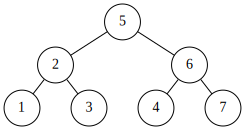

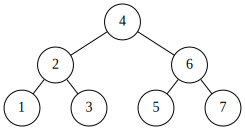

In [ ]:
no_abb.dibujar()
abb.dibujar()

In [ ]:
print("Arbol incorrecto:", checkABB(no_abb.raiz))
print("Arbol correcto:", checkABB(abb.raiz))

Arbol incorrecto: False
Arbol correcto: True


# P3: Transpose y Move to Front

Tamara y Mariana quieren guardar más datos de lo recomendado para un diccionario tal como
se vio en cátedra. Además, saben que necesitarán ciertos valores más seguido que otros.
Tamara plantea como solución que al buscar un elemento, este luego se mueva uno más cerca del
inicio, para poder acceder más rápido la siguiente vez que se busque.

* Implemente la idea de Tamara en una función ```transpose(x, a, n)```. Esta debe buscar 𝑥
dentro del arreglo 𝑎 que contiene 𝑛 elementos. Si se encuentra el elemento, este se mueve una
posición más adelante, lo que llamamos transposición. En caso contrario, se debe agregar 𝑥 al
final del arreglo y luego realizar la transposición.

Mariana ve la proposición de Tamara y decide formular una propia. En vez de mover el elemento
buscado una posición más cerca del inicio, Mariana propone moverlo al frente del arreglo para
acceder más rápido.

 * Repita lo anterior pero ahora implementando la idea de Mariana en una función
```move_to_front(x, a, n)```


In [ ]:
def transpose(x, a, n):
 buscar 𝑥 dentro del arreglo 𝑎 que contiene 𝑛 elementos. Si se encuentra el elemento, este se mueve una posición más adelante

In [ ]:
def move_to_front(x, a, n):
  i = 0
  # Incrementamos i hasta que sea igual a n, o hasta encontrar x
  while i < n and a[i] != x:
    i += 1

  # Si no encontramos x, lo agregamos al final
  if i == n:
    a[n] = x

  # Si x no se encuentra en la primera posición, lo movemos al principio
  while 0 < i:
    a[i-1], a[i] = a[i], a[i-1]
    i -= 1

# P4: Gatito en el árbol (Propuesto)

Al gatito de Alan le gusta trepar al árbol binario de su jardín. El problema es que todavía no
sabe cómo bajarse de ahí, así que siempre tienen que buscarlo. Debido a lo frondoso del árbol,
no tiene más remedio que buscarlo rama por rama (nodo por nodo). Como Alan quiere subir lo
menos posible al realizar la búsqueda por temor a caer, cada vez que trepa una rama él quiere
buscar todos los nodos en ese nivel (esto es una Búsqueda a lo ancho, BFS). Tu objetivo es ayudar
a Alan a salvar su gatito del árbol.

Los nodos del árbol se definen en la siguiente clase:

In [ ]:
class NodoG:
  def __init__(self,val, gatito,izq = None, der = None):
    self.val = str(val) + ' 😿' if gatito else str(val)
    self.gatito = gatito #True si está el gatito, False si no
    self.izq = izq
    self.der = der
#clase de arbol del curso
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
    def dibujar(self):
        btd = aed.BinaryTreeDrawer(fieldData="val", fieldLeft="izq", fieldRight="der")
        btd.draw_tree(self, "raiz")

Para bajar al gatito del árbol, utilice la clase Cola vista en clase, y cree un programa que muestre
en pantalla los valores de los nodos que ha recorrido Alan hasta encontrar a su gatito, de izquierda
a derecha en cada nivel. Por ejemplo, en el árbol de la figura, la salida sería: 42 78 15 27 49 4

In [ ]:
#Función Cola del Curso
class Cola:
    def __init__(self):
        self.q=[]
    def enq(self,x):
        self.q.insert(0,x)
    def deq(self):
        assert len(self.q)>0
        return self.q.pop()
    def is_empty(self):
        return len(self.q)==0

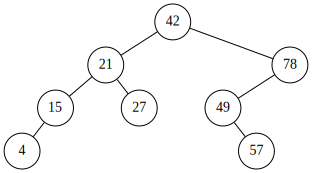

In [ ]:
#Creamos y dibujamos el árbol del enunciado

arbol = Arbol(NodoG(42, False, NodoG(21, False, NodoG(15, False, NodoG(4, True, None, None), None),
                                        NodoG(27, False, None, None)),NodoG(78, False, NodoG(49, False, None, NodoG(57, False, None, None)), None)))
arbol.dibujar()

In [ ]:
def buscar_gatito(arbol):
    q = Cola()                                 #Creamos una cola
    q.enq(arbol.raiz)                          #Encolamos el nodo raiz en la cola
    while not q.is_empty():                    #Iteramos hasta que la cola quede vacía
        rama = q.deq()                         #Sacamos un Nodo de la cola
        print(rama.val)
        if rama.gatito:                        #Vemos si este Nodo contiene al gatito
            break
        if rama.izq:                           #Si no está el gatito, entonces vemo si existe la rama izquierda
            q.enq(rama.izq)                      #Si existe un Nodo izquierdo lo encolamos en la cola
        if rama.der:                           #Si no está el gatito, entonces vemo si existe la rama derecha
            q.enq(rama.der)                    #Si existe un Nodo derecho lo encolamos en la cola

In [ ]:
#Vemos el ejemplo puesto en el enunciado
buscar_gatito(arbol)

42
21
78
15
27
49
4 😿
